# Projection Plots

<div class="alert alert-block alert-info">
 
## Goals:

* Introduce `ProjectPlot` class and understand the difference from `SlicePlot`
* Introduce off-axis plots
* Learn how to annotate projection plots and change their style
    
</div>

In [1]:
import yt

In [2]:
ds = yt.load_sample("IsolatedGalaxy")

yt : [INFO     ] 2020-03-22 19:17:14,514 Files located at /home/zingale/.cache/yt/IsolatedGalaxy.tar.gz.untar/IsolatedGalaxy/galaxy0030/galaxy0030
yt : [INFO     ] 2020-03-22 19:17:14,515 Default to loading galaxy0030/galaxy0030 for IsolatedGalaxy dataset
yt : [INFO     ] 2020-03-22 19:17:14,653 Parameters: current_time              = 0.0060000200028298
yt : [INFO     ] 2020-03-22 19:17:14,654 Parameters: domain_dimensions         = [32 32 32]
yt : [INFO     ] 2020-03-22 19:17:14,655 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2020-03-22 19:17:14,656 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2020-03-22 19:17:14,657 Parameters: cosmological_simulation   = 0.0


## A First Plot

A slice plot is simply passing a plane through your dataset and recording the data values that the plane intersects.  

A projection plot is the result of integrating the data through the domain along a particular direction.

Both of these operations results in a 2-d representation of 3-d data.

Parsing Hierarchy : 100%|██████████| 173/173 [00:00<00:00, 3460.15it/s]
yt : [INFO     ] 2020-03-22 19:17:14,736 Gathering a field list (this may take a moment.)
yt : [INFO     ] 2020-03-22 19:17:16,568 Projection completed
yt : [INFO     ] 2020-03-22 19:17:16,578 xlim = 0.000000 1.000000
yt : [INFO     ] 2020-03-22 19:17:16,579 ylim = 0.000000 1.000000
yt : [INFO     ] 2020-03-22 19:17:16,580 xlim = 0.000000 1.000000
yt : [INFO     ] 2020-03-22 19:17:16,581 ylim = 0.000000 1.000000
yt : [INFO     ] 2020-03-22 19:17:16,591 Making a fixed resolution buffer of (('enzo', 'Density')) 800 by 800



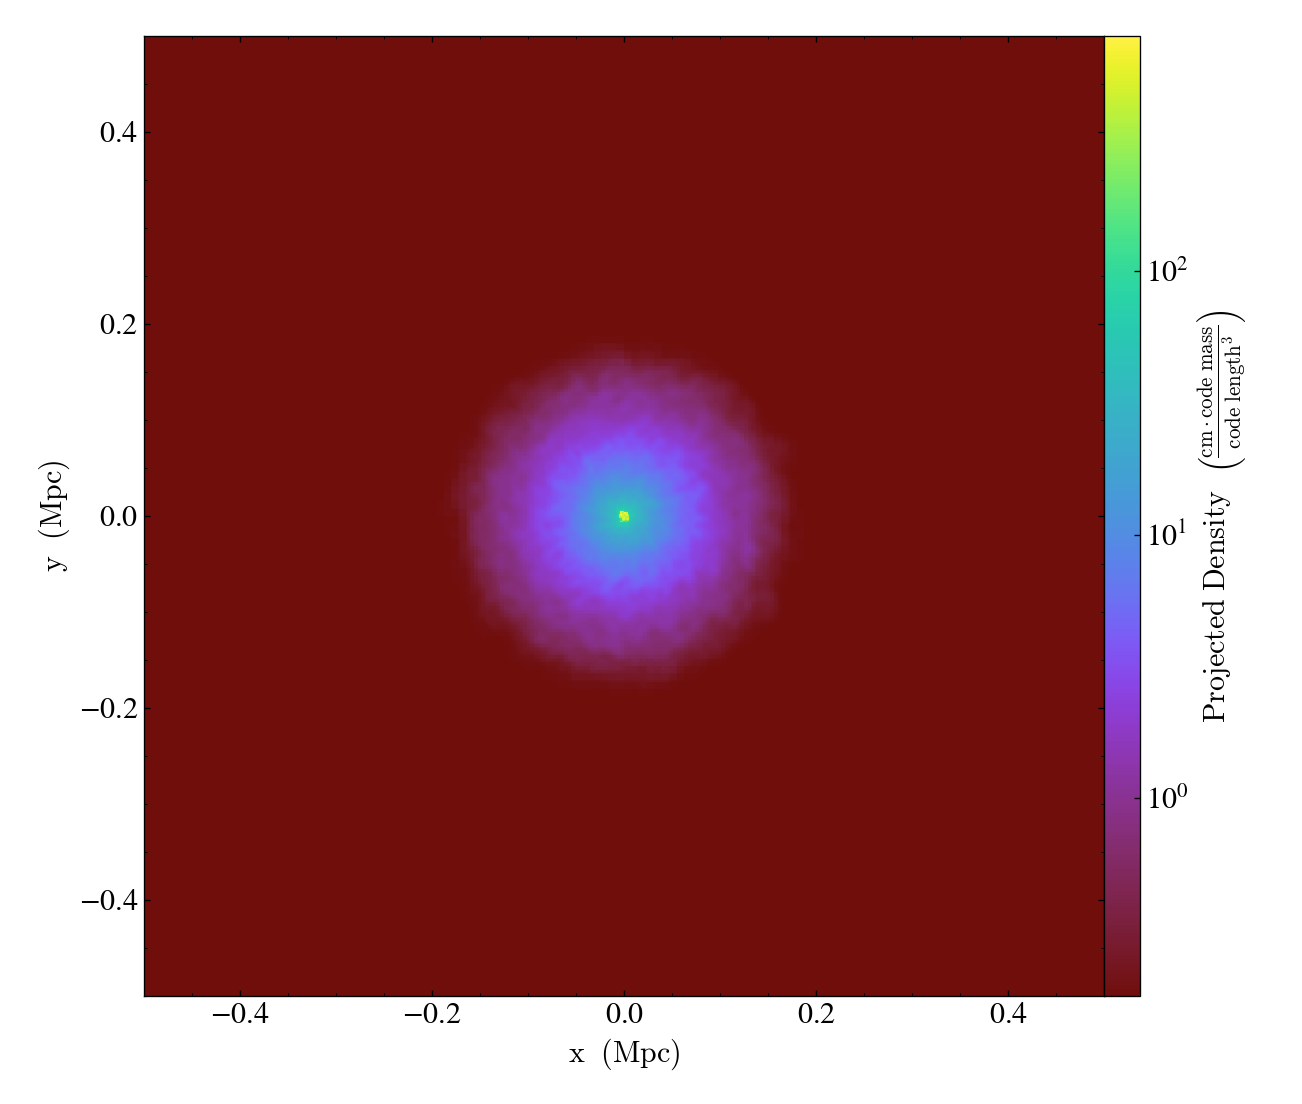

In [3]:
yt.ProjectionPlot(ds, "z", "Density")

Compare to the similar slice plot

yt : [INFO     ] 2020-03-22 19:17:17,877 xlim = 0.000000 1.000000
yt : [INFO     ] 2020-03-22 19:17:17,879 ylim = 0.000000 1.000000
yt : [INFO     ] 2020-03-22 19:17:17,881 xlim = 0.000000 1.000000
yt : [INFO     ] 2020-03-22 19:17:17,884 ylim = 0.000000 1.000000
yt : [INFO     ] 2020-03-22 19:17:17,892 Making a fixed resolution buffer of (('enzo', 'Density')) 800 by 800



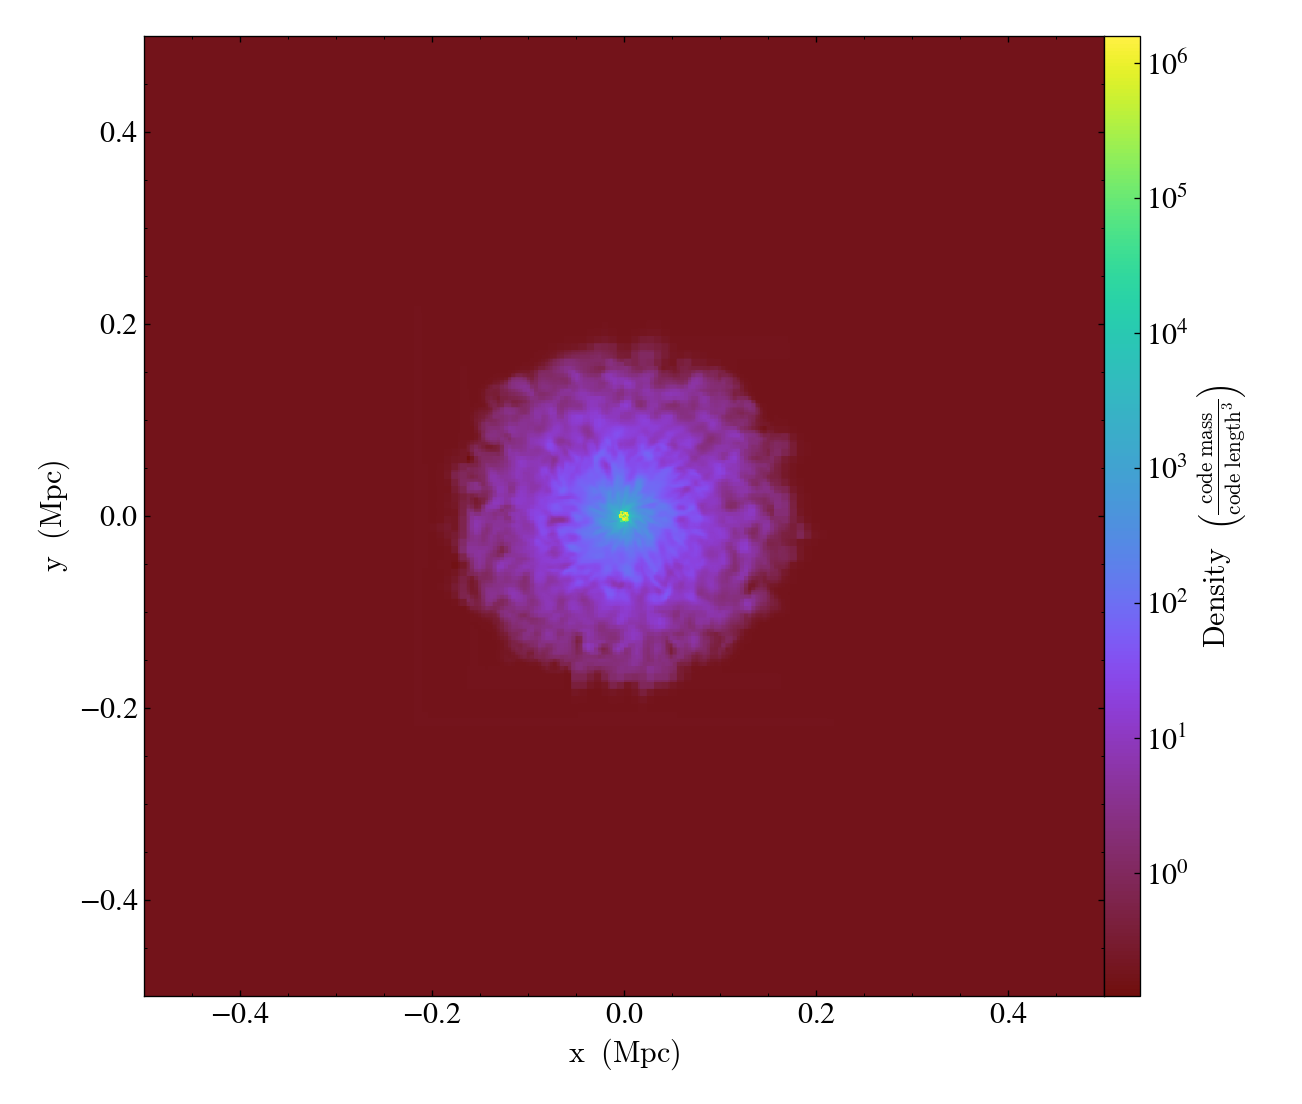

In [4]:
yt.SlicePlot(ds, "z", "Density")

Some observations:
    
* The units on the color scale are different, representing that one is a slice and the other is an integral
* The finer structure that appears in the slice is not as strong in the projection

## Projection Types

### unweighted 

The default projection is an *unweighted projection*.

An unweighted projection along the z-direction does the following integral:
$$
F(x, y) = \int f(x, y, z) dz
$$
Here, $f(x, y, z)$ are the data values for our chosen field (`"Density"` in the above image), and $F(x, y)$ is the resulting projection / image.  Notice that it is two-dimensional, since we integrated out one of the dimension.

For a projection in an arbitrary direction, we'd write:
$$
F(q_1, q_2) = \int f({\bf x}) \hat{{\bf n}} \cdot d{\bf x}
$$
where $\hat{\bf n}$ is the unit normal and $q_1$ and $q_2$ are the two coordinate directions orthognal to $\hat{\bf n}$.

Now notice in this form that the units are the units of $f$ $\times$ `length`.

### weighted

A weighted projection along the z-direction does the following integral:
$$
F(x, y) = \frac{\int f(x, y, z) w(x, y, z) dz}{\int w(x, y, z) dz}
$$
Here, $w(x, y, z)$ is another field from your dataset and acts as a weight.  

Note: due to the normalization, the resulting projection, $F(x, y)$ has the same units as $f(x, y, z)$.

The general form is:
$$
F(q_1, q_2) = \frac{\int f({\bf x}) w({\bf x}) \hat{\bf n} \cdot d{\bf x}}
                   {\int w({\bf x}) \hat{\bf n} \cdot d{\bf x}}
                   $$

see https://yt-project.org/docs/dev/visualizing/plots.html#types-of-projections for more details

## Weighted Projection

Let's make a density-weighted projection of temperature

yt : [INFO     ] 2020-03-22 19:17:19,651 Projection completed
yt : [INFO     ] 2020-03-22 19:17:19,651 xlim = 0.000000 1.000000
yt : [INFO     ] 2020-03-22 19:17:19,652 ylim = 0.000000 1.000000
yt : [INFO     ] 2020-03-22 19:17:19,653 xlim = 0.000000 1.000000
yt : [INFO     ] 2020-03-22 19:17:19,654 ylim = 0.000000 1.000000
yt : [INFO     ] 2020-03-22 19:17:19,656 Making a fixed resolution buffer of (('gas', 'temperature')) 800 by 800
yt : [INFO     ] 2020-03-22 19:17:19,904 Making a fixed resolution buffer of (('gas', 'temperature')) 800 by 800



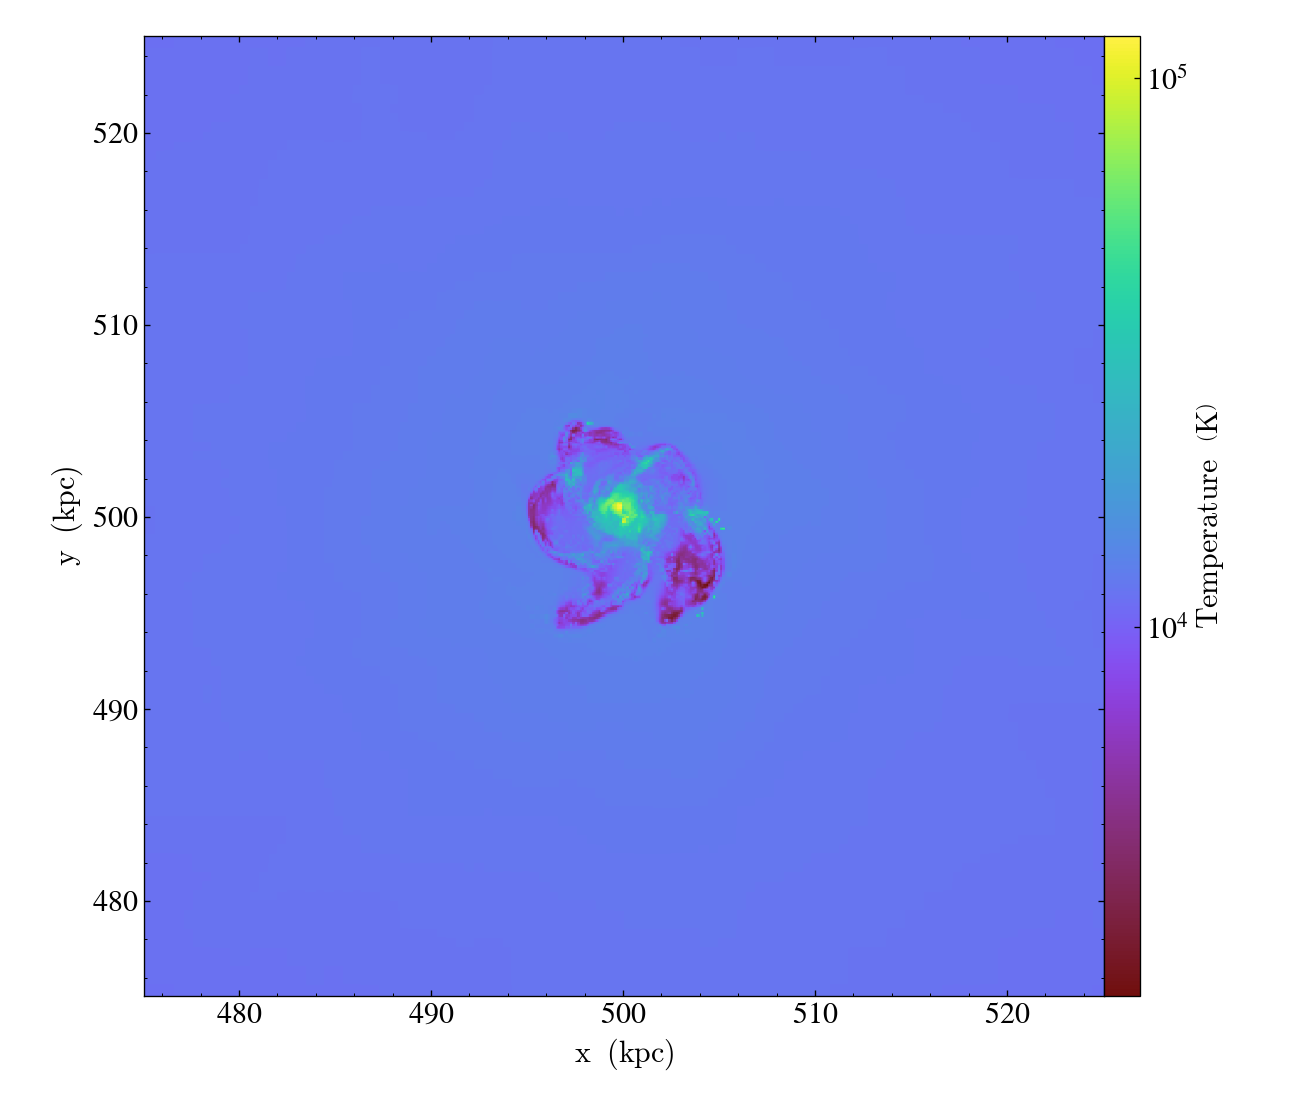

In [5]:
p = yt.ProjectionPlot(ds, "z", "temperature", weight_field="density", origin="native")
p.zoom(20)

Compare to the corresponding unweighted projection:

yt : [INFO     ] 2020-03-22 19:17:21,281 Projection completed
yt : [INFO     ] 2020-03-22 19:17:21,282 xlim = 0.000000 1.000000
yt : [INFO     ] 2020-03-22 19:17:21,283 ylim = 0.000000 1.000000
yt : [INFO     ] 2020-03-22 19:17:21,284 xlim = 0.000000 1.000000
yt : [INFO     ] 2020-03-22 19:17:21,285 ylim = 0.000000 1.000000
yt : [INFO     ] 2020-03-22 19:17:21,288 Making a fixed resolution buffer of (('gas', 'temperature')) 800 by 800
yt : [INFO     ] 2020-03-22 19:17:21,548 Making a fixed resolution buffer of (('gas', 'temperature')) 800 by 800



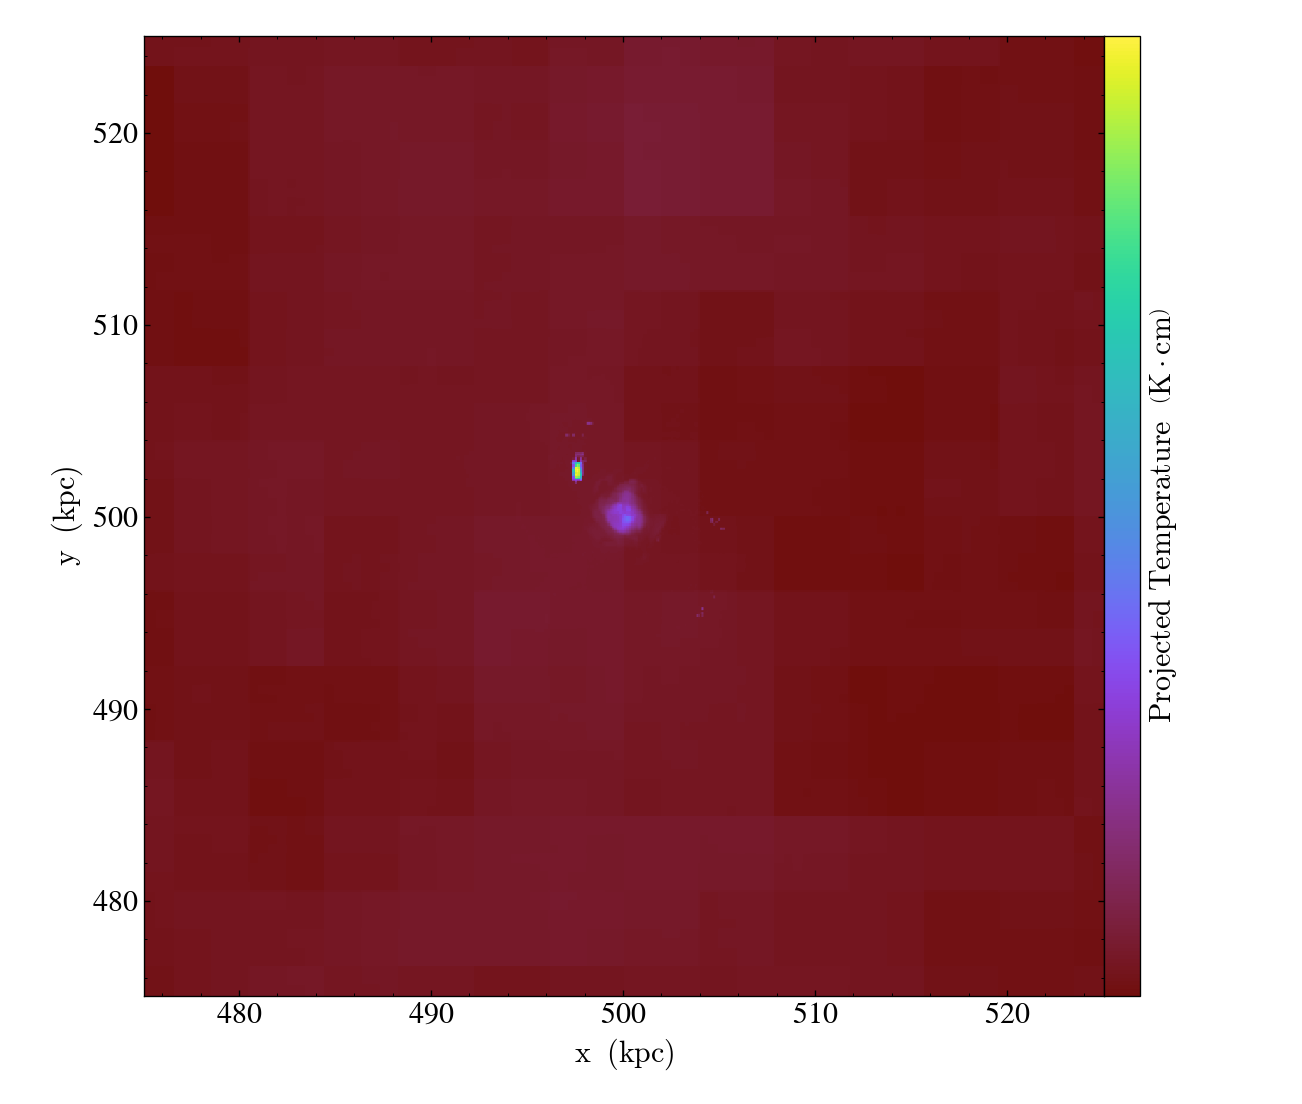

In [6]:
p = yt.ProjectionPlot(ds, "z", "temperature", origin="native")
p.zoom(20)

and the corresponding slice plot:

yt : [INFO     ] 2020-03-22 19:17:22,565 xlim = 0.000000 1.000000
yt : [INFO     ] 2020-03-22 19:17:22,566 ylim = 0.000000 1.000000
yt : [INFO     ] 2020-03-22 19:17:22,572 xlim = 0.000000 1.000000
yt : [INFO     ] 2020-03-22 19:17:22,573 ylim = 0.000000 1.000000
yt : [INFO     ] 2020-03-22 19:17:22,577 Making a fixed resolution buffer of (('gas', 'temperature')) 800 by 800
yt : [INFO     ] 2020-03-22 19:17:22,883 Making a fixed resolution buffer of (('gas', 'temperature')) 800 by 800



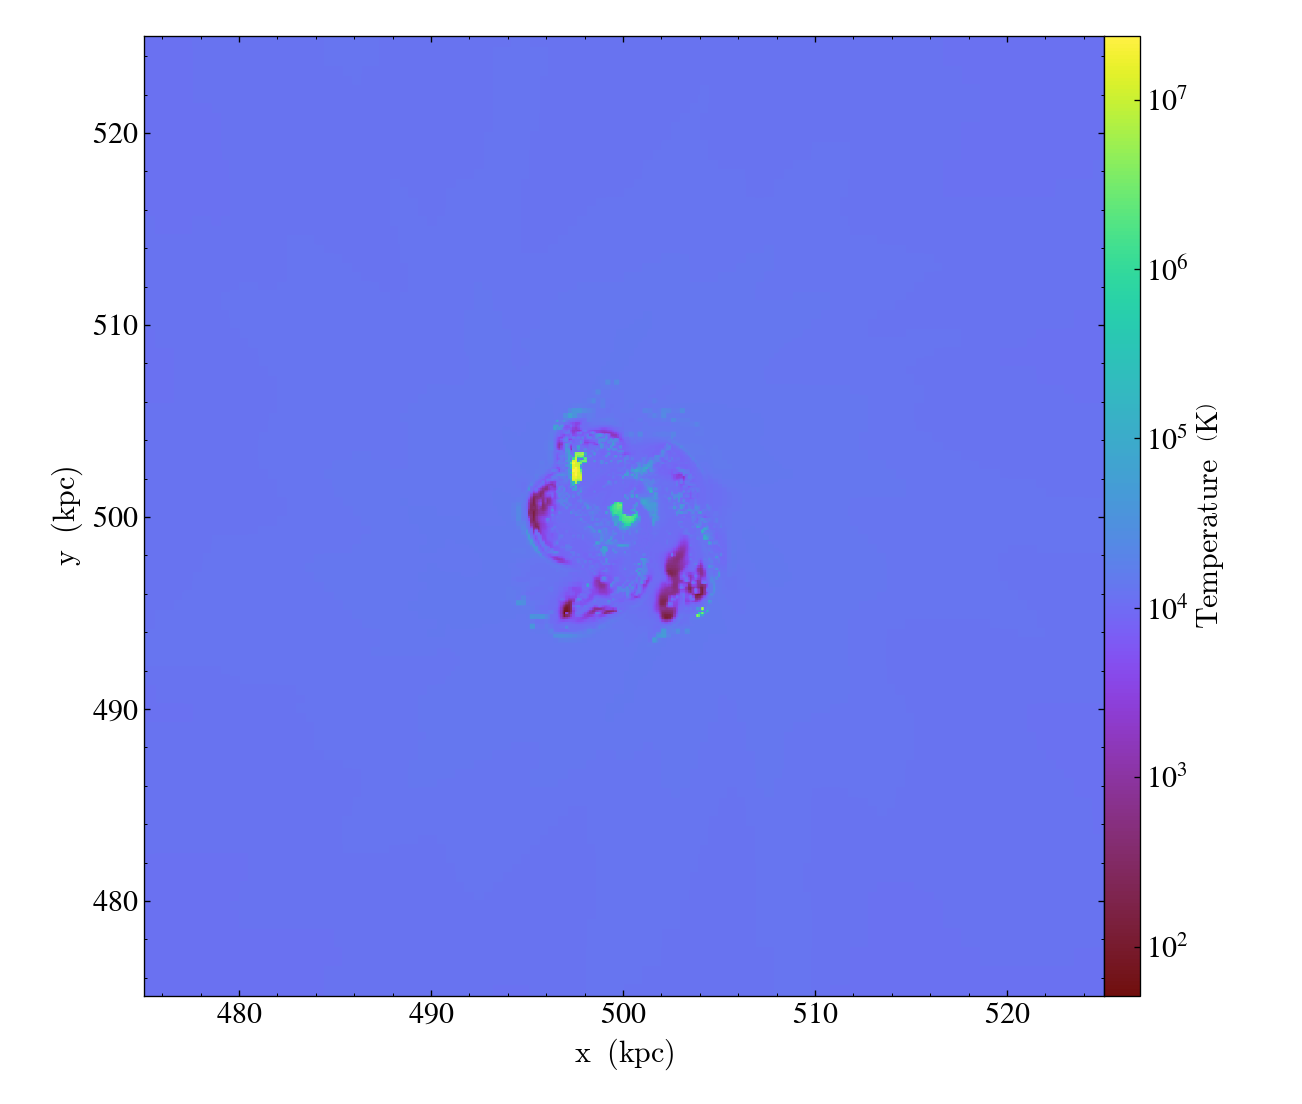

In [7]:
sp = yt.SlicePlot(ds, "z", "temperature", origin="native")
sp.zoom(20)

## Thin-Slice Projections

Here, instead of doing the integral over the full z-extent to the domain, we limit it to a narrow region.  In the limit that the width of the region goes to one zone in our simulation, the projection will approach a slice plot

https://yt-project.org/docs/dev/cookbook/complex_plots.html#thin-slice-projections

We start by making a region the full extent in x and y, but just 20 kpc in z, centered on the center of the domain

In [8]:
center = ds.domain_center
lower_left = ds.domain_left_edge
upper_right = ds.domain_right_edge

depth = ds.quan(40, "kpc")

lower_left[2] = center[2] - 0.5*depth
upper_right[2] = lower_left[2] + depth

region = ds.box(lower_left, upper_right)

In [9]:
print(region)

YTRegion (galaxy0030): , center=[1.543e+24 1.543e+24 1.543e+24] cm, left_edge=[0.00000000e+00 0.00000000e+00 1.48128645e+24] cm, right_edge=[3.08600000e+24 3.08600000e+24 1.60471355e+24] cm


Now when we make the projection, we use the keyword argument `data_source` to pass in the region to operate over

yt : [INFO     ] 2020-03-22 19:17:23,604 xlim = 0.000000 1.000000
yt : [INFO     ] 2020-03-22 19:17:23,605 ylim = 0.000000 1.000000
yt : [INFO     ] 2020-03-22 19:17:23,606 xlim = 0.000000 1.000000
yt : [INFO     ] 2020-03-22 19:17:23,607 ylim = 0.000000 1.000000
yt : [INFO     ] 2020-03-22 19:17:23,609 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800



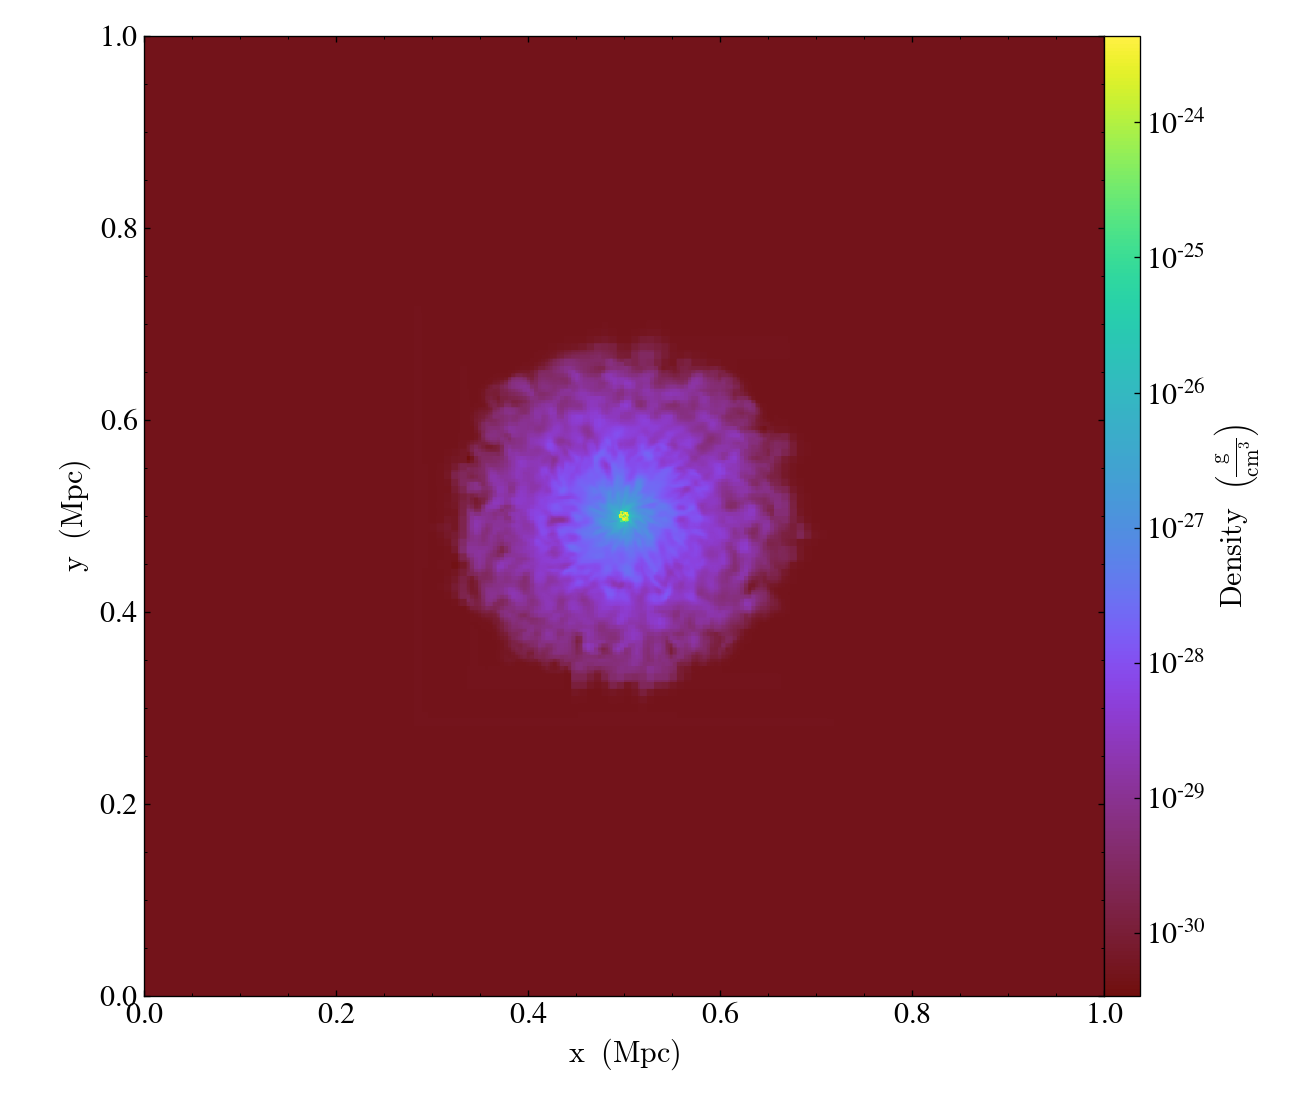

In [10]:
p = yt.SlicePlot(ds, "z", "density",
                      origin="native", data_source=region)
p

Important: zones only participate in the projection if their centers fall inside the region.  If you make this region too thin, then coarse zones (from the lower AMR levels) will not participate

## Off-Axis Projections

So far, for both slices and projections, we've always been taking the normal to be along one of the coordinate axes.  However, we can use an arbitrary normal for this.

For an off-axis projection plot, it will use the same infrastructure as with volume rendering to shoot rays at oblique angles through the domain.  Since there is no natural grid that defines the resolution of the off-axis plane, a fixed-resolution buffer will be created (by default 800 x 800 pixels).



yt : [INFO     ] 2020-03-22 19:17:27,184 xlim = -0.024997 0.024997
yt : [INFO     ] 2020-03-22 19:17:27,184 ylim = -0.024997 0.024997
yt : [INFO     ] 2020-03-22 19:17:27,185 zlim = -0.500000 0.500000
yt : [INFO     ] 2020-03-22 19:17:27,186 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800


Angular momentum vector: [8.85748212e+25 8.51990642e+25 4.99255795e+28] cm**2/s cm**2/s



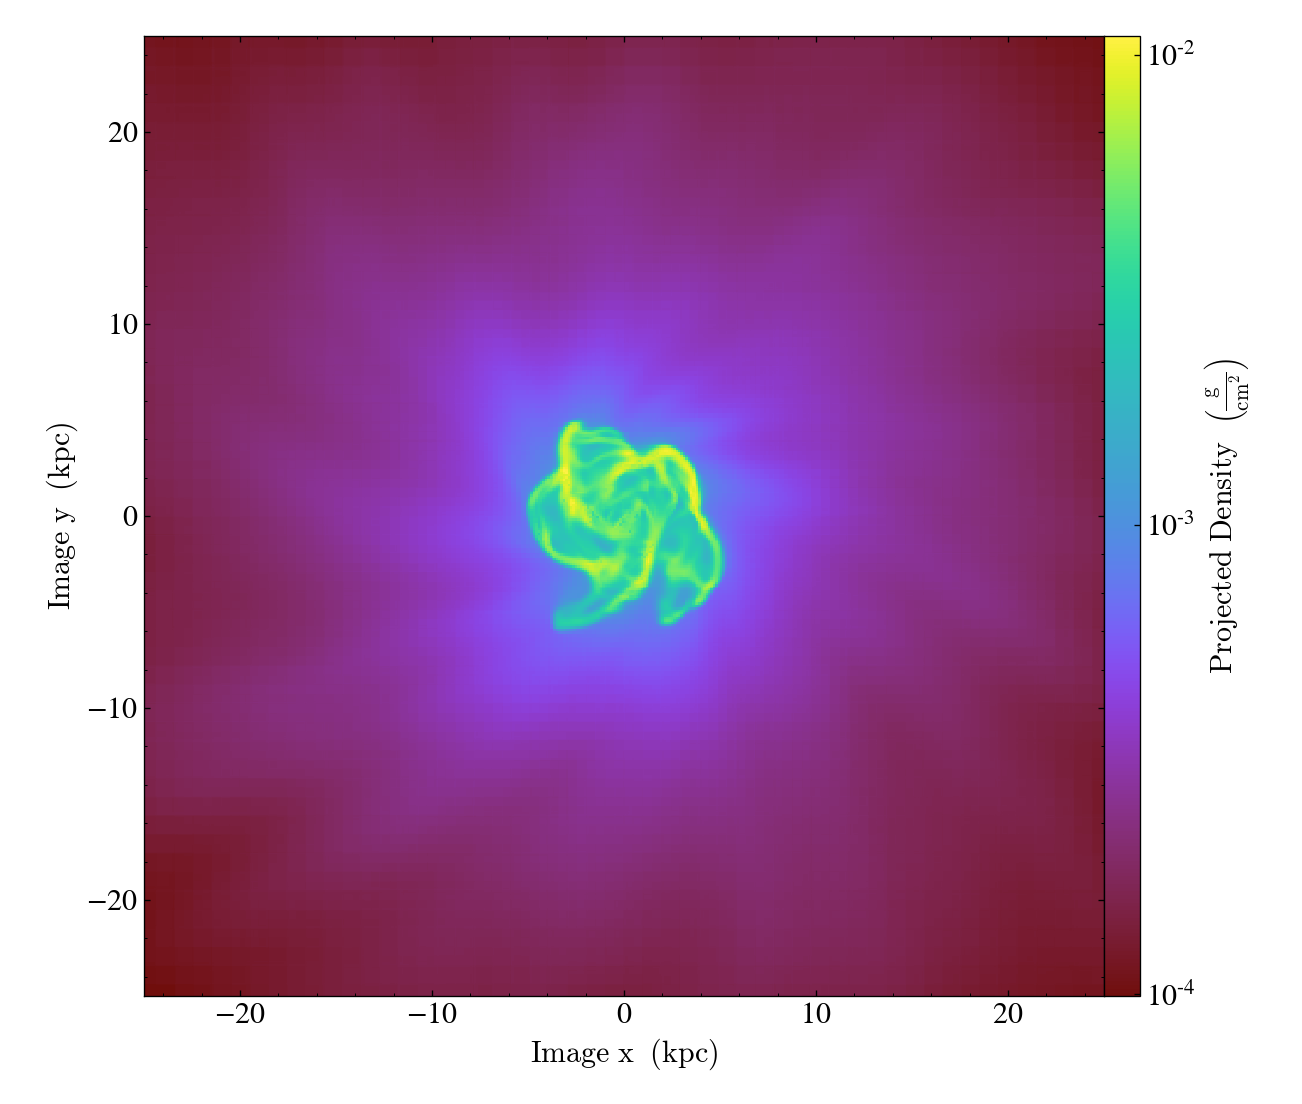

In [11]:
sp = ds.sphere("center", (15.0, "kpc"))

# Get the angular momentum vector for the sphere.
L = sp.quantities.angular_momentum_vector()

print("Angular momentum vector: {0}".format(L))

# Create an OffAxisProjectionPlot of density centered on the object with the L
# vector as its normal and a width of 25 kpc on a side
p = yt.OffAxisProjectionPlot(ds, L, "density", center=sp.center, width=(50, "kpc"))
p

Some notes:

* Instead of a coordinate direction, "x", "y", or "z", we pass a vector in as the normal.  This is just a sequence of floats.

* For very fine detail, we will want to use a higher-resolution image buffer, see the `.set_buff_size()` option

More details can be found here:
https://yt-project.org/docs/dev/reference/api/yt.visualization.plot_window.html#yt.visualization.plot_window.OffAxisProjectionPlot  


<div class="alert alert-block alert-warning">

## Afternoon Exercise
    
There are a number of annotations that can be made to both projection plots and slice plots.  A good example is described here: https://yt-project.org/docs/dev/cookbook/simple_plots.html#annotating-plots-to-include-lines-text-shapes-etc

Try to add the simulation time to the projection plot.

</div>